# Import libraries and read data

In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

/home/resaln/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
# time series data folder path
time_series_data_path = "COVID-19/csse_covid_19_data/csse_covid_19_time_series"

# global data
confirmed_global_path = f'{time_series_data_path}/time_series_covid19_confirmed_global.csv'
deaths_global_path = f'{time_series_data_path}/time_series_covid19_deaths_global.csv'
recovered_global_path = f'{time_series_data_path}/time_series_covid19_recovered_global.csv'

# U.S. data
confirmed_us_path = f'{time_series_data_path}/time_series_covid19_confirmed_US.csv'
deaths_us_path = f'{time_series_data_path}/time_series_covid19_deaths_US.csv'

In [3]:
# global data
confirmed_global_df = pd.read_csv(confirmed_global_path)
deaths_global_df = pd.read_csv(deaths_global_path)
recovered_global_df = pd.read_csv(recovered_global_path)

# U.S data
confirmed_us_df = pd.read_csv(confirmed_us_path)
deaths_us_df = pd.read_csv(deaths_us_path)

# Helper functions

In [4]:
def save_fig_as_div(fig_obj, file_name, fig_config=None):
    with open(f'charts/{file_name}', 'w') as fig_file:
        fig_div_string = plotly.offline.plot(figure_or_data=fig_obj, output_type='div',
                                             include_plotlyjs='cdn', auto_play=False,
                                             config=fig_config)
        fig_file.write(fig_div_string)

In [5]:
def get_n_color_palette(palette_name, n_colors, as_hex=False):
    palette = sns.color_palette(palette=palette_name, n_colors=n_colors)
    if as_hex:
        palette = palette.as_hex()
    palette.reverse()
    return palette

# Get to know the data:

## Globally confirmed cases:

In [6]:
confirmed_global_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...    29157    29481    29640    30175   
1        0        0        0  ...     1995     2047     2114     2192   
2        0        0        0  ...    11920    12076    12248    12445   
3        0        0        0  ...      855      855      855      855   
4        0        0        0  ...      186      189      197      212   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    30451    30616    30967    31238    31517   31836  
1     2269     2330     2402     2466     2535    2580  
2    12685    12968    13273    13571    13907   14272  
3      855      855      855      855      855     855  
4      212      259      267      276      284     291  

[5 rows x 166 columns]

In [7]:
confirmed_global_df.shape

(266, 166)

## Globally deaths:

In [8]:
deaths_global_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...      598      618      639      675   
1        0        0        0  ...       44       45       47       49   
2        0        0        0  ...      852      861      869      878   
3        0        0        0  ...       52       52       52       52   
4        0        0        0  ...       10       10       10       10   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0      683      703      721      733      746     774  
1       51       53       55       58       62      65  
2      885      892      897      905      912     920  
3       52       52       52       52       52      52  
4       10       10       11       11       13      15  

[5 rows x 166 columns]

In [9]:
deaths_global_df.shape

(266, 166)

## Globally recovered cases:

In [10]:
recovered_global_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...     8841     9260     9869    10174   
1        0        0        0  ...     1159     1195     1217     1250   
2        0        0        0  ...     8559     8674     8792     8920   
3        0        0        0  ...      796      797      797      797   
4        0        0        0  ...       77       77       77       81   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    10306    10674    12604    13934    14131   15651  
1     1298     1346     1384     1438     1459    1516  
2     9066     9202     9371     9674     9897   10040  
3      799      799      799      799      799     799  
4       81       81       81       93       93      97  

[5 rows x 166 columns]

In [11]:
recovered_global_df.shape

(253, 166)

## U.S. confirmed cases:

In [12]:
confirmed_us_df.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0 -14.2710 -170.1320  ...       0        0        0        0        0   
1  13.4443  144.7937  ...     222      225      226      231      247   
2  15.0979  145.6739  ...      30       30       30       30       30   
3  18.2208  -66.5901  ...    6564     6685     6820     6877     6922   
4  18.3358  -64.8963  ...      76       76       76       80       81   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0        0        0        0        0       0  
1      247      247      253      257     267  
2       30       30       30       30      30  
3     7066     7189     7250     7465    7537  
4       81       81       81       81      90  

[5 rows x 173 columns]

In [13]:
confirmed_us_df.shape

(3261, 173)

## U.S. deaths:

In [14]:
deaths_us_df.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0 -14.2710 -170.1320  ...       0        0        0        0        0   
1  13.4443  144.7937  ...       5        5        5        5        5   
2  15.0979  145.6739  ...       2        2        2        2        2   
3  18.2208  -66.5901  ...     149      149      149      151      151   
4  18.3358  -64.8963  ...       6        6        6        6        6   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0        0        0        0        0       0  
1        5        5        5        5       5  
2        2        2        2        2       2  
3      152      153      153      153     153  
4        6        6        6        6       6  

[5 rows x 174 columns]

In [15]:
deaths_us_df.shape

(3261, 174)

## Summary:

The three datasets share the same structure, and have the same fields, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
Fields descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the *cumulative* number of cases up until this date.

It can be seen that the `U.S.` dataset differs from the `global` one, as it has these additional columns: UID, iso2, iso3, code3, FIPS (we'll get to them later)

# Data Preprocessing:

In [16]:
# global data
print(f'Globally confirmed cases: {confirmed_global_df.shape}')
print(f'Globally deaths: {deaths_global_df.shape}')
print(f'Globally recovered cases: {recovered_global_df.shape}')

# U.S. data
print(f'U.S. Confirmed cases: {confirmed_us_df.shape}')
print(f'U.S. deaths: {deaths_us_df.shape}')

Globally confirmed cases: (266, 166)
Globally deaths: (266, 166)
Globally recovered cases: (253, 166)
U.S. Confirmed cases: (3261, 173)
U.S. deaths: (3261, 174)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

## 1 - Drop irrelevant columns:
`Lat` and `Long` columns specify the coordinates of the case, we won't be needing this inofrmation right now.

In [17]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [18]:
irrelevant_columns = ['Lat', 'Long']

In [19]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, irrelevant_columns)
deaths_global_df = drop_irrelevant_columns(deaths_global_df, irrelevant_columns)
recovered_global_df = drop_irrelevant_columns(recovered_global_df, irrelevant_columns)

In [20]:
confirmed_global_df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...    29157    29481    29640    30175   
1        0        0        0  ...     1995     2047     2114     2192   
2        0        0        0  ...    11920    12076    12248    12445   
3        0        0        0  ...      855      855      855      855   
4        0        0        0  ...      186      189      197      212   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    30451    30616    30967    31238    31517   31836  
1     2269     2330     2402     2466     2535    2580  
2    12685    12968    13273    13571    13907   14272  
3      855      855      855      855      855     855  
4      212      259      267      276      284     291  

[5 rows x 164 columns]

In [21]:
deaths_global_df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...      598      618      639      675   
1        0        0        0  ...       44       45       47       49   
2        0        0        0  ...      852      861      869      878   
3        0        0        0  ...       52       52       52       52   
4        0        0        0  ...       10       10       10       10   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0      683      703      721      733      746     774  
1       51       53       55       58       62      65  
2      885      892      897      905      912     920  
3       52       52       52       52       52      52  
4       10       10       11       11       13      15  

[5 rows x 164 columns]

In [22]:
recovered_global_df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...     8841     9260     9869    10174   
1        0        0        0  ...     1159     1195     1217     1250   
2        0        0        0  ...     8559     8674     8792     8920   
3        0        0        0  ...      796      797      797      797   
4        0        0        0  ...       77       77       77       81   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    10306    10674    12604    13934    14131   15651  
1     1298     1346     1384     1438     1459    1516  
2     9066     9202     9371     9674     9897   10040  
3      799      799      799      799      799     799  
4       81       81       81       93       93      97  

[5 rows x 164 columns]

Also, drop columns `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Admin2`, `Combined_Key` from the `U.S.` data:

In [23]:
irrelevant_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key']

In [24]:
confirmed_us_df = drop_irrelevant_columns(confirmed_us_df, irrelevant_columns)
deaths_us_df = drop_irrelevant_columns(deaths_us_df, irrelevant_columns)

In [25]:
confirmed_us_df.head()

Province_State Country_Region  1/22/20  1/23/20  1/24/20  \
0            American Samoa             US        0        0        0   
1                      Guam             US        0        0        0   
2  Northern Mariana Islands             US        0        0        0   
3               Puerto Rico             US        0        0        0   
4            Virgin Islands             US        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  ...  6/22/20  6/23/20  \
0        0        0        0        0        0  ...        0        0   
1        0        0        0        0        0  ...      222      225   
2        0        0        0        0        0  ...       30       30   
3        0        0        0        0        0  ...     6564     6685   
4        0        0        0        0        0  ...       76       76   

   6/24/20  6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0        0        0        0        0        0        0        0       0  
1      226      231      247      247      247      253      257     267  
2       30       30       30       30       30       30       30      30  
3     6820     6877     6922     7066     7189     7250     7465    7537  
4       76       80       81       81       81       81       81      90  

[5 rows x 164 columns]

In [26]:
deaths_us_df.head()

Province_State Country_Region  Population  1/22/20  1/23/20  \
0            American Samoa             US       55641        0        0   
1                      Guam             US      164229        0        0   
2  Northern Mariana Islands             US       55144        0        0   
3               Puerto Rico             US     2933408        0        0   
4            Virgin Islands             US      107268        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  ...  6/22/20  6/23/20  \
0        0        0        0        0        0  ...        0        0   
1        0        0        0        0        0  ...        5        5   
2        0        0        0        0        0  ...        2        2   
3        0        0        0        0        0  ...      149      149   
4        0        0        0        0        0  ...        6        6   

   6/24/20  6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0        0        0        0        0        0        0        0       0  
1        5        5        5        5        5        5        5       5  
2        2        2        2        2        2        2        2       2  
3      149      151      151      152      153      153      153     153  
4        6        6        6        6        6        6        6       6  

[5 rows x 165 columns]

only deaths data has the column `Population`, but it should the same for the confirmed data also.

In [27]:
confirmed_us_df.insert(2, 'Population', deaths_us_df['Population'])

In [28]:
confirmed_us_df.head()

Province_State Country_Region  Population  1/22/20  1/23/20  \
0            American Samoa             US       55641        0        0   
1                      Guam             US      164229        0        0   
2  Northern Mariana Islands             US       55144        0        0   
3               Puerto Rico             US     2933408        0        0   
4            Virgin Islands             US      107268        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  ...  6/22/20  6/23/20  \
0        0        0        0        0        0  ...        0        0   
1        0        0        0        0        0  ...      222      225   
2        0        0        0        0        0  ...       30       30   
3        0        0        0        0        0  ...     6564     6685   
4        0        0        0        0        0  ...       76       76   

   6/24/20  6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0        0        0        0        0        0        0        0       0  
1      226      231      247      247      247      253      257     267  
2       30       30       30       30       30       30       30      30  
3     6820     6877     6922     7066     7189     7250     7465    7537  
4       76       80       81       81       81       81       81      90  

[5 rows x 165 columns]

## 2 - Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `State` and `Country` respectively.

In [29]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [30]:
columns_mapping = {
    'Province/State': 'State',
    'Province_State': 'State',
    'Country/Region': 'Country',
    'Country_Region': 'Country'
}

In [31]:
# global data
confirmed_global_df = rename_columns(confirmed_global_df, columns_mapping)
deaths_global_df = rename_columns(deaths_global_df, columns_mapping)
recovered_global_df = rename_columns(recovered_global_df, columns_mapping)

# U.S. data
confirmed_us_df = rename_columns(confirmed_us_df, columns_mapping)
deaths_us_df = rename_columns(deaths_us_df, columns_mapping)

### Global data:

In [32]:
confirmed_global_df.head()

State      Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0   NaN  Afghanistan        0        0        0        0        0        0   
1   NaN      Albania        0        0        0        0        0        0   
2   NaN      Algeria        0        0        0        0        0        0   
3   NaN      Andorra        0        0        0        0        0        0   
4   NaN       Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...    29157    29481    29640    30175    30451   
1        0        0  ...     1995     2047     2114     2192     2269   
2        0        0  ...    11920    12076    12248    12445    12685   
3        0        0  ...      855      855      855      855      855   
4        0        0  ...      186      189      197      212      212   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    30616    30967    31238    31517   31836  
1     2330     2402     2466     2535    2580  
2    12968    13273    13571    13907   14272  
3      855      855      855      855     855  
4      259      267      276      284     291  

[5 rows x 164 columns]

In [33]:
deaths_global_df.head()

State      Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0   NaN  Afghanistan        0        0        0        0        0        0   
1   NaN      Albania        0        0        0        0        0        0   
2   NaN      Algeria        0        0        0        0        0        0   
3   NaN      Andorra        0        0        0        0        0        0   
4   NaN       Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...      598      618      639      675      683   
1        0        0  ...       44       45       47       49       51   
2        0        0  ...      852      861      869      878      885   
3        0        0  ...       52       52       52       52       52   
4        0        0  ...       10       10       10       10       10   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0      703      721      733      746     774  
1       53       55       58       62      65  
2      892      897      905      912     920  
3       52       52       52       52      52  
4       10       11       11       13      15  

[5 rows x 164 columns]

In [34]:
recovered_global_df.head()

State      Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0   NaN  Afghanistan        0        0        0        0        0        0   
1   NaN      Albania        0        0        0        0        0        0   
2   NaN      Algeria        0        0        0        0        0        0   
3   NaN      Andorra        0        0        0        0        0        0   
4   NaN       Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...     8841     9260     9869    10174    10306   
1        0        0  ...     1159     1195     1217     1250     1298   
2        0        0  ...     8559     8674     8792     8920     9066   
3        0        0  ...      796      797      797      797      799   
4        0        0  ...       77       77       77       81       81   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    10674    12604    13934    14131   15651  
1     1346     1384     1438     1459    1516  
2     9202     9371     9674     9897   10040  
3      799      799      799      799     799  
4       81       81       93       93      97  

[5 rows x 164 columns]

### U.S. data:

In [35]:
confirmed_us_df.head()

State Country  Population  1/22/20  1/23/20  1/24/20  \
0            American Samoa      US       55641        0        0        0   
1                      Guam      US      164229        0        0        0   
2  Northern Mariana Islands      US       55144        0        0        0   
3               Puerto Rico      US     2933408        0        0        0   
4            Virgin Islands      US      107268        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  ...  6/22/20  6/23/20  6/24/20  \
0        0        0        0        0  ...        0        0        0   
1        0        0        0        0  ...      222      225      226   
2        0        0        0        0  ...       30       30       30   
3        0        0        0        0  ...     6564     6685     6820   
4        0        0        0        0  ...       76       76       76   

   6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0        0        0        0        0        0        0       0  
1      231      247      247      247      253      257     267  
2       30       30       30       30       30       30      30  
3     6877     6922     7066     7189     7250     7465    7537  
4       80       81       81       81       81       81      90  

[5 rows x 165 columns]

In [36]:
deaths_us_df.head()

State Country  Population  1/22/20  1/23/20  1/24/20  \
0            American Samoa      US       55641        0        0        0   
1                      Guam      US      164229        0        0        0   
2  Northern Mariana Islands      US       55144        0        0        0   
3               Puerto Rico      US     2933408        0        0        0   
4            Virgin Islands      US      107268        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  ...  6/22/20  6/23/20  6/24/20  \
0        0        0        0        0  ...        0        0        0   
1        0        0        0        0  ...        5        5        5   
2        0        0        0        0  ...        2        2        2   
3        0        0        0        0  ...      149      149      149   
4        0        0        0        0  ...        6        6        6   

   6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0        0        0        0        0        0        0       0  
1        5        5        5        5        5        5       5  
2        2        2        2        2        2        2       2  
3      151      151      152      153      153      153     153  
4        6        6        6        6        6        6       6  

[5 rows x 165 columns]

## 3 - Drop `State` column from the global data:
most records of the global data doesn't have `State` value, so it's better to drop it.

In [37]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, 'State')
deaths_global_df = drop_irrelevant_columns(deaths_global_df, 'State')
recovered_global_df = drop_irrelevant_columns(recovered_global_df, 'State')

In [38]:
confirmed_global_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...    29157    29481    29640    30175    30451   
1        0        0  ...     1995     2047     2114     2192     2269   
2        0        0  ...    11920    12076    12248    12445    12685   
3        0        0  ...      855      855      855      855      855   
4        0        0  ...      186      189      197      212      212   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    30616    30967    31238    31517   31836  
1     2330     2402     2466     2535    2580  
2    12968    13273    13571    13907   14272  
3      855      855      855      855     855  
4      259      267      276      284     291  

[5 rows x 163 columns]

In [39]:
deaths_global_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...      598      618      639      675      683   
1        0        0  ...       44       45       47       49       51   
2        0        0  ...      852      861      869      878      885   
3        0        0  ...       52       52       52       52       52   
4        0        0  ...       10       10       10       10       10   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0      703      721      733      746     774  
1       53       55       58       62      65  
2      892      897      905      912     920  
3       52       52       52       52      52  
4       10       11       11       13      15  

[5 rows x 163 columns]

In [40]:
recovered_global_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...     8841     9260     9869    10174    10306   
1        0        0  ...     1159     1195     1217     1250     1298   
2        0        0  ...     8559     8674     8792     8920     9066   
3        0        0  ...      796      797      797      797      799   
4        0        0  ...       77       77       77       81       81   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    10674    12604    13934    14131   15651  
1     1346     1384     1438     1459    1516  
2     9202     9371     9674     9897   10040  
3      799      799      799      799     799  
4       81       81       93       93      97  

[5 rows x 163 columns]

## 4 - Aggregate data:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases at each day for each country.

aggregate global data:

In [41]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [42]:
by_column = 'Country'

In [43]:
# global
confirmed_global_agg_df = apply_aggregation(confirmed_global_df, by_column)
deaths_global_agg_df = apply_aggregation(deaths_global_df, by_column)
recovered_global_agg_df = apply_aggregation(recovered_global_df, by_column)

In [44]:
confirmed_global_agg_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...    29157    29481    29640    30175    30451   
1        0        0  ...     1995     2047     2114     2192     2269   
2        0        0  ...    11920    12076    12248    12445    12685   
3        0        0  ...      855      855      855      855      855   
4        0        0  ...      186      189      197      212      212   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    30616    30967    31238    31517   31836  
1     2330     2402     2466     2535    2580  
2    12968    13273    13571    13907   14272  
3      855      855      855      855     855  
4      259      267      276      284     291  

[5 rows x 163 columns]

In [45]:
deaths_global_agg_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...      598      618      639      675      683   
1        0        0  ...       44       45       47       49       51   
2        0        0  ...      852      861      869      878      885   
3        0        0  ...       52       52       52       52       52   
4        0        0  ...       10       10       10       10       10   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0      703      721      733      746     774  
1       53       55       58       62      65  
2      892      897      905      912     920  
3       52       52       52       52      52  
4       10       11       11       13      15  

[5 rows x 163 columns]

In [46]:
recovered_global_agg_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0        0        0  ...     8841     9260     9869    10174    10306   
1        0        0  ...     1159     1195     1217     1250     1298   
2        0        0  ...     8559     8674     8792     8920     9066   
3        0        0  ...      796      797      797      797      799   
4        0        0  ...       77       77       77       81       81   

   6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    10674    12604    13934    14131   15651  
1     1346     1384     1438     1459    1516  
2     9202     9371     9674     9897   10040  
3      799      799      799      799     799  
4       81       81       93       93      97  

[5 rows x 163 columns]

aggregate U.S. data:

In [47]:
by_columns = ['Country', 'State']

In [48]:
confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_columns)
deaths_us_agg_df = apply_aggregation(deaths_us_df, by_columns)

In [49]:
confirmed_us_agg_df.head()

Country           State  Population  1/22/20  1/23/20  1/24/20  1/25/20  \
0      US         Alabama     4903185        0        0        0        0   
1      US          Alaska     1220488        0        0        0        0   
2      US  American Samoa       55641        0        0        0        0   
3      US         Arizona     7278717        0        0        0        0   
4      US        Arkansas     3017804        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...    30454    31097    32064    33206   
1        0        0        0  ...      758      760      789      813   
2        0        0        0  ...        0        0        0        0   
3        1        1        1  ...    54599    58378    60190    63281   
4        0        0        0  ...    16083    16678    17375    18062   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    34183    35083    35441    37175    38045   38962  
1      833      851      880      901      937     975  
2        0        0        0        0        0       0  
3    66659    70124    73920    74545    79228   84105  
4    18740    19310    19818    20257    20777   21197  

[5 rows x 165 columns]

In [50]:
deaths_us_agg_df.head()

Country           State  Population  1/22/20  1/23/20  1/24/20  1/25/20  \
0      US         Alabama     4903185        0        0        0        0   
1      US          Alaska      731545        0        0        0        0   
2      US  American Samoa       55641        0        0        0        0   
3      US         Arizona     7278717        0        0        0        0   
4      US        Arkansas     3017804        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...      841      864      891      896   
1        0        0        0  ...       12       12       12       12   
2        0        0        0  ...        0        0        0        0   
3        0        0        0  ...     1351     1396     1467     1495   
4        0        0        0  ...      227      237      240      240   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0      907      919      919      929      950     972  
1       14       14       14       14       14      14  
2        0        0        0        0        0       0  
3     1536     1580     1594     1598     1645    1725  
4      249      259      264      265      270     277  

[5 rows x 165 columns]

## 5 - create `Population` dataframe for the `U.S.` data:

Later, we will convert the data to time series structure, and the value of `Population` shouldn't be in a time series data, as it doesn't change over time, it's rather a characteristic of the state.

In [51]:
us_population_df = confirmed_us_agg_df[['Country', 'State', 'Population']]

In [52]:
confirmed_us_agg_df = drop_irrelevant_columns(confirmed_us_agg_df, ['Population'])
deaths_us_agg_df = drop_irrelevant_columns(deaths_us_agg_df, ['Population'])

In [53]:
confirmed_us_agg_df.head()

Country           State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0      US         Alabama        0        0        0        0        0   
1      US          Alaska        0        0        0        0        0   
2      US  American Samoa        0        0        0        0        0   
3      US         Arizona        0        0        0        0        1   
4      US        Arkansas        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...    30454    31097    32064    33206   
1        0        0        0  ...      758      760      789      813   
2        0        0        0  ...        0        0        0        0   
3        1        1        1  ...    54599    58378    60190    63281   
4        0        0        0  ...    16083    16678    17375    18062   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0    34183    35083    35441    37175    38045   38962  
1      833      851      880      901      937     975  
2        0        0        0        0        0       0  
3    66659    70124    73920    74545    79228   84105  
4    18740    19310    19818    20257    20777   21197  

[5 rows x 164 columns]

In [54]:
deaths_us_agg_df.head()

Country           State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0      US         Alabama        0        0        0        0        0   
1      US          Alaska        0        0        0        0        0   
2      US  American Samoa        0        0        0        0        0   
3      US         Arizona        0        0        0        0        0   
4      US        Arkansas        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  6/22/20  6/23/20  6/24/20  6/25/20  \
0        0        0        0  ...      841      864      891      896   
1        0        0        0  ...       12       12       12       12   
2        0        0        0  ...        0        0        0        0   
3        0        0        0  ...     1351     1396     1467     1495   
4        0        0        0  ...      227      237      240      240   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  
0      907      919      919      929      950     972  
1       14       14       14       14       14      14  
2        0        0        0        0        0       0  
3     1536     1580     1594     1598     1645    1725  
4      249      259      264      265      270     277  

[5 rows x 164 columns]

## 6 - Restructe the Data:
convert the data into an easier structure, add column `date`, and change the columns to rows (for easier manipulation)

In [55]:
date_columns = confirmed_global_agg_df.filter(regex='\d{1,2}/\d{1,2}/\d{1,4}').columns.values

In [56]:
def construct_date_df(df, date_column_name, copy_columns, value_column_name):
    
    data = {}
    
    data['date'] = date_column_name
    
    for column in copy_columns:
        data[column] = df[column]
    
    data[value_column_name] = df[date_column_name]
    
    date_df = pd.DataFrame(data=data)
    
    return date_df

In [57]:
# global data
confirmed_global_date_frames = [construct_date_df(confirmed_global_agg_df, date_column, ['Country'], 'confirmed') for date_column in date_columns]
deaths_global_date_frames = [construct_date_df(deaths_global_agg_df, date_column, ['Country'], 'deaths') for date_column in date_columns]
recovered_global_date_frames = [construct_date_df(recovered_global_agg_df, date_column, ['Country'], 'recovered') for date_column in date_columns]

# U.S. data
confirmed_us_date_frames = [construct_date_df(confirmed_us_agg_df, date_column, ['Country', 'State'], 'confirmed') for date_column in date_columns]
deaths_us_date_frames = [construct_date_df(deaths_us_agg_df, date_column, ['Country', 'State'], 'deaths') for date_column in date_columns]

In [58]:
# global data
confirmed_global_time_series = pd.concat(confirmed_global_date_frames)
deaths_global_time_series = pd.concat(deaths_global_date_frames)
recovered_global_time_series = pd.concat(recovered_global_date_frames)

# U.S. data
confirmed_us_time_series = pd.concat(confirmed_us_date_frames)
deaths_us_time_series = pd.concat(deaths_us_date_frames)

## 7 - Convert `date` column:

In [59]:
def convert_col_to_datetime(df, col_name):
    
    df[col_name] = pd.to_datetime(df[col_name], utc=False)
    
    df[col_name] = df[col_name].dt.strftime("%Y-%m-%d")
    
    df.sort_values(by='date', inplace=True)
    
    return df

In [60]:
# global data
confirmed_global_time_series = convert_col_to_datetime(confirmed_global_time_series, 'date')
deaths_global_time_series = convert_col_to_datetime(deaths_global_time_series, 'date')
recovered_global_time_series = convert_col_to_datetime(recovered_global_time_series, 'date')

# U.S. data
confirmed_us_time_series = convert_col_to_datetime(confirmed_us_time_series, 'date')
deaths_us_time_series = convert_col_to_datetime(deaths_us_time_series, 'date')

In [61]:
confirmed_global_time_series.head()

date      Country  confirmed
0    2020-01-22  Afghanistan          0
120  2020-01-22      Namibia          0
121  2020-01-22        Nepal          0
122  2020-01-22  Netherlands          0
123  2020-01-22  New Zealand          0

In [62]:
deaths_global_time_series.head()

date      Country  deaths
0    2020-01-22  Afghanistan       0
120  2020-01-22      Namibia       0
121  2020-01-22        Nepal       0
122  2020-01-22  Netherlands       0
123  2020-01-22  New Zealand       0

In [63]:
recovered_global_time_series.head()

date      Country  recovered
0    2020-01-22  Afghanistan          0
120  2020-01-22      Namibia          0
121  2020-01-22        Nepal          0
122  2020-01-22  Netherlands          0
123  2020-01-22  New Zealand          0

Active cases: the number of active cases on a particular day is:

    active = confirmed - (deaths + recovered)

In [64]:
active_cases = confirmed_global_time_series['confirmed'] - (deaths_global_time_series['deaths'] + recovered_global_time_series['recovered'])

In [65]:
active_global_time_series = pd.DataFrame(data={
    'date': confirmed_global_time_series.date,
    'Country': confirmed_global_time_series.Country,
    'active': active_cases
})

In [66]:
active_global_time_series.head()

date      Country  active
0    2020-01-22  Afghanistan       0
120  2020-01-22      Namibia       0
121  2020-01-22        Nepal       0
122  2020-01-22  Netherlands       0
123  2020-01-22  New Zealand       0

In [67]:
confirmed_us_time_series.head()

date Country          State  confirmed
0   2020-01-22      US        Alabama          0
31  2020-01-22      US       Nebraska          0
32  2020-01-22      US         Nevada          0
33  2020-01-22      US  New Hampshire          0
34  2020-01-22      US     New Jersey          0

In [68]:
deaths_us_time_series.head()

date Country          State  deaths
0   2020-01-22      US        Alabama       0
31  2020-01-22      US       Nebraska       0
32  2020-01-22      US         Nevada       0
33  2020-01-22      US  New Hampshire       0
34  2020-01-22      US     New Jersey       0

in the rest of the notebook, we will focus on the following five dataframes:
- `confirmed_global_time_series`: time series of the global confirmed cases.
- `deaths_global_time_series`: time series of the global deaths.
- `recovered_global_time_series`: time series of the global recovered cases.
- `confirmed_us_time_series`: time series of U.S. confirmed cases.
- `deaths_us_time_series`: time series of U.S. deaths.

A *time series* data shows the change in a *statiscal variable* according to *time*.


Each row in the previous time series is a tuple of date, country, and measure, the measure represents the cumulative sum in the country, up until the date.

## 8 - Focus on *Outbreaks*:
We will focus in this notebook only on countries with high **death tolls**, countires that are nearly affected by the pandemic will be discarded.

In [69]:
last_day = deaths_global_time_series['date'].values[-1]

In [70]:
most_affected_10_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                        .sort_values(by='deaths', ascending=False)\
                                                        [:10]

In [71]:
most_affected_20_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                        .sort_values(by='deaths', ascending=False)\
                                                        [:20]

In [72]:
most_affected_10_countries

date         Country  deaths
174  2020-07-01              US  128062
23   2020-07-01          Brazil   60632
178  2020-07-01  United Kingdom   43991
85   2020-07-01           Italy   34788
62   2020-07-01          France   29864
113  2020-07-01          Mexico   28510
158  2020-07-01           Spain   28364
79   2020-07-01           India   17834
81   2020-07-01            Iran   10958
134  2020-07-01            Peru    9860

In [73]:
most_affected_10_countries_names = most_affected_10_countries['Country'].values

In [74]:
most_affected_20_countries_names = most_affected_20_countries['Country'].values

Create time series for most affected countries:

In [75]:
most_10_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country']\
                                                       .isin(most_affected_10_countries_names)]

In [76]:
most_10_deaths_time_series.head()

date         Country  deaths
134  2020-01-22            Peru       0
113  2020-01-22          Mexico       0
174  2020-01-22              US       0
178  2020-01-22  United Kingdom       0
158  2020-01-22           Spain       0

In [77]:
most_20_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country']\
                                                       .isin(most_affected_20_countries_names)]

In [78]:
most_20_deaths_time_series.head()

date      Country  deaths
122  2020-01-22  Netherlands       0
134  2020-01-22         Peru       0
113  2020-01-22       Mexico       0
173  2020-01-22       Turkey       0
174  2020-01-22           US       0

In [79]:
most_10_confirmed_time_series = confirmed_global_time_series[confirmed_global_time_series['Country']\
                                                             .isin(most_affected_10_countries_names)]

In [80]:
most_10_confirmed_time_series.head()

date         Country  confirmed
134  2020-01-22            Peru          0
113  2020-01-22          Mexico          0
174  2020-01-22              US          1
178  2020-01-22  United Kingdom          0
158  2020-01-22           Spain          0

In [81]:
most_10_recovered_time_series = recovered_global_time_series[recovered_global_time_series['Country']\
                                                             .isin(most_affected_10_countries_names)]

In [82]:
most_10_recovered_time_series.head()

date         Country  recovered
134  2020-01-22            Peru          0
113  2020-01-22          Mexico          0
174  2020-01-22              US          0
178  2020-01-22  United Kingdom          0
158  2020-01-22           Spain          0

In [83]:
most_10_active_time_series = active_global_time_series[active_global_time_series['Country']\
                                                             .isin(most_affected_10_countries_names)]

In [84]:
most_10_active_time_series.head()

date         Country  active
134  2020-01-22            Peru       0
113  2020-01-22          Mexico       0
174  2020-01-22              US       1
178  2020-01-22  United Kingdom       0
158  2020-01-22           Spain       0

# Data Visualization:

In [85]:
white_color_hex = '#FFFFFF'
blue_color_hex = '#04668C'
green_color_hex = '#158A24'
orange_color_hex = '#F77300'
coquelicot_color_hex = '#EC4414'
red_color_hex = '#E01427'
purple_color_hex = '#613266'

## Line Chart:

### Deaths trajectory

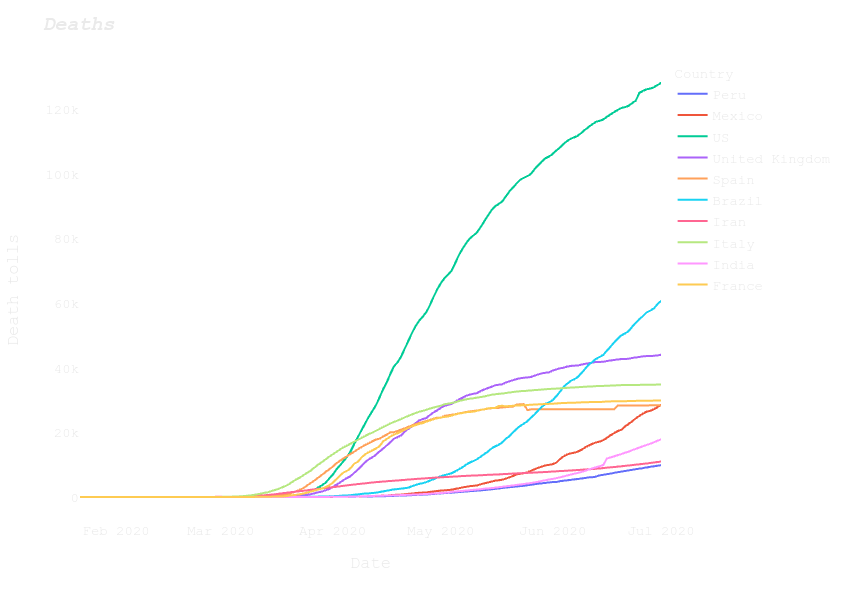

In [86]:
fig = px.line(data_frame=most_10_deaths_time_series, x='date', y='deaths', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Deaths</b></i>',
                  xaxis_title="Date", yaxis_title="Death tolls",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [87]:
save_fig_as_div(fig_obj=fig, file_name="death_tolls_line_chart.html")

### Active cases trajectory

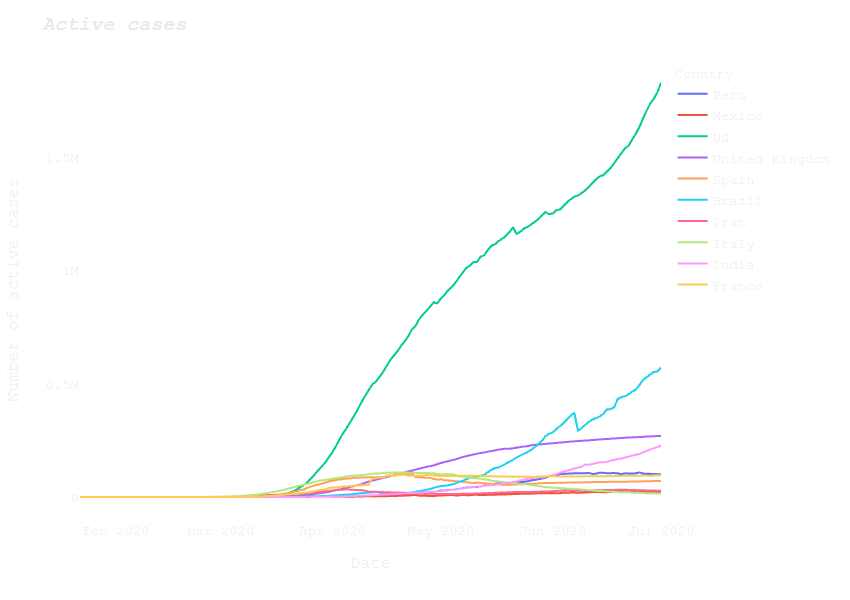

In [88]:
fig = px.line(data_frame=most_10_active_time_series, x='date', y='active', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Active cases</b></i>',
                  xaxis_title="Date", yaxis_title="Number of active cases",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [89]:
save_fig_as_div(fig_obj=fig, file_name="active_cases_line_chart.html")

### Recovery trajectory:

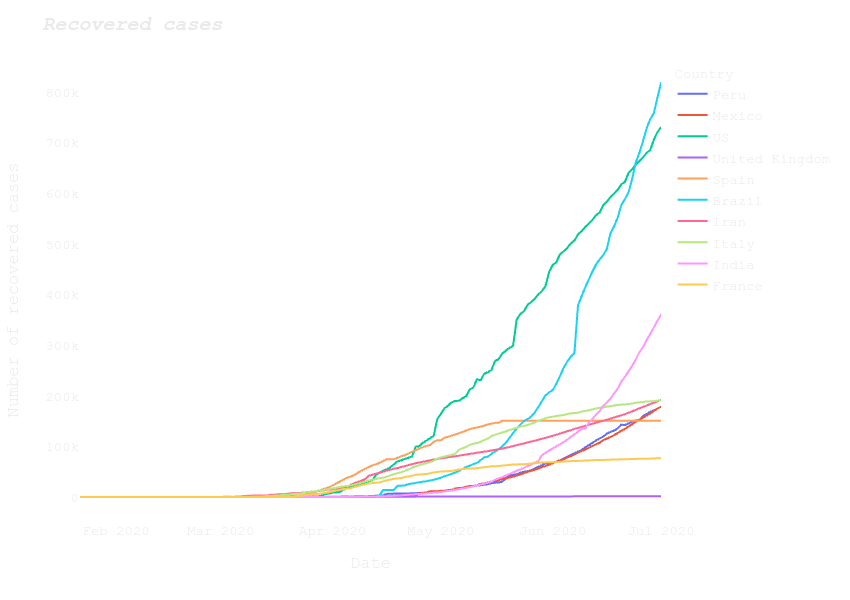

In [90]:
fig = px.line(data_frame=most_10_recovered_time_series, x='date', y='recovered', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Recovered cases</b></i>',
                  xaxis_title="Date", yaxis_title="Number of recovered cases",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [91]:
save_fig_as_div(fig_obj=fig, file_name="recovered_cases_line_chart.html")

## Global Choropleth Map:

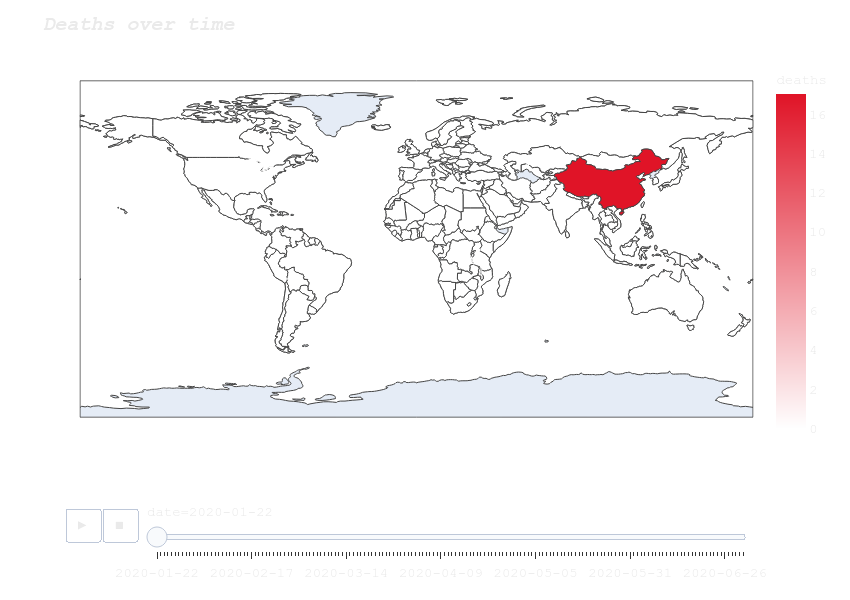

In [92]:
fig = px.choropleth(data_frame=deaths_global_time_series, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths',
                    animation_frame=deaths_global_time_series.date,
                    color_continuous_scale=[white_color_hex, red_color_hex])

# update figure layout
fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Deaths over time</b></i>',
                  xaxis_title="Measures", yaxis_title="Class",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

# disable mouse scroll zoom
fig.show(config={
    'scrollZoom': False
})

In [93]:
save_fig_as_div(fig_obj=fig, file_name="global_deaths_choropleth_map.html", fig_config={
    'scrollZoom': False
})

## U.S. Choropleth:

In [94]:
# dataset that contains U.S. states codes
# Plotly only accept U.S. states as codes
us_states_codes_df = pd.read_csv('other-data/us-states-codes.csv')

In [95]:
us_states_codes_df.head()

State  Abbrev Code
0     Alabama    Ala.   AL
1      Alaska  Alaska   AK
2     Arizona   Ariz.   AZ
3    Arkansas    Ark.   AR
4  California  Calif.   CA

In [96]:
# join U.S. deaths dataset with U.S. codes dataset on `State` name
temp_df = deaths_us_time_series.merge(right=us_states_codes_df,
                                      left_on='State',
                                      right_on='State',
                                      how='left')

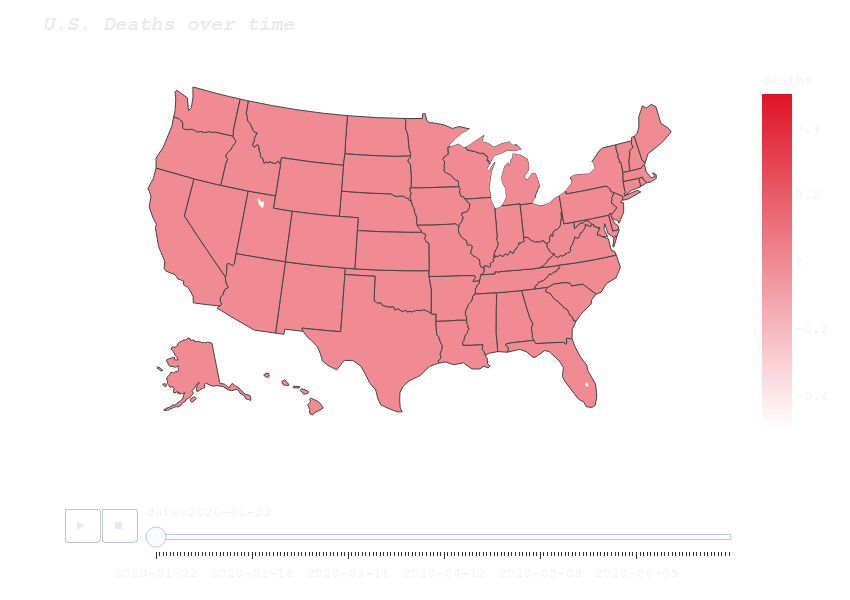

In [97]:
fig = px.choropleth(data_frame=temp_df,
                    locations='Code',
                    locationmode="USA-states",
                    color='deaths',
                    animation_frame=temp_df.date,
                    scope="usa",
                    color_continuous_scale=[white_color_hex, red_color_hex], hover_data=['State'])

# update figure layout
fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>U.S. Deaths over time</b></i>',
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

# disable mouse scroll zoom
fig.show(config={
    'scrollZoom': False
})

In [98]:
save_fig_as_div(fig_obj=fig, file_name="us_deaths_choropleth_map.html", fig_config={
    'scrollZoom': False
})

## Daily deaths

In [99]:
def get_daily_deaths(deaths_columns):
    '''
    this function calculates the daily deaths from the time series of accumulated deaths
    it takes the accumulated deaths array, and returns the original array which corresponds to deaths at each day
    '''
    number_of_days = len(deaths_columns)
    daily_deaths = deaths_columns[0]
    # to calculate the original array subtract deaths[0..yesterday] from deaths[1..today]
    diff = np.absolute(deaths_columns[1:number_of_days] - deaths_columns[0:number_of_days - 1])
    daily_deaths = np.append(daily_deaths, diff)
    return daily_deaths

In [100]:
def get_daily_deaths_df(df, country_name):
    '''
    this function constructs a new Series called `daily deaths` for the passed dataframe
    the `daily deaths` Series represents the daily deaths values at each day
    '''
    new_df = df[df['Country'] == country_name]
    country_daily_deaths = get_daily_deaths(new_df['deaths'].values)
    
    # add new column for daily deaths
    new_df = new_df.assign(daily_deaths=country_daily_deaths)
    return new_df

Add daily deaths column for most affected countries:

In [101]:
countries_daily_deaths = pd.concat([get_daily_deaths_df(most_10_deaths_time_series, country_name)
                                    for country_name in most_affected_10_countries_names])

In [102]:
countries_daily_deaths.head()

date Country  deaths  daily_deaths
174  2020-01-22      US       0             0
174  2020-01-23      US       0             0
174  2020-01-24      US       0             0
174  2020-01-25      US       0             0
174  2020-01-26      US       0             0

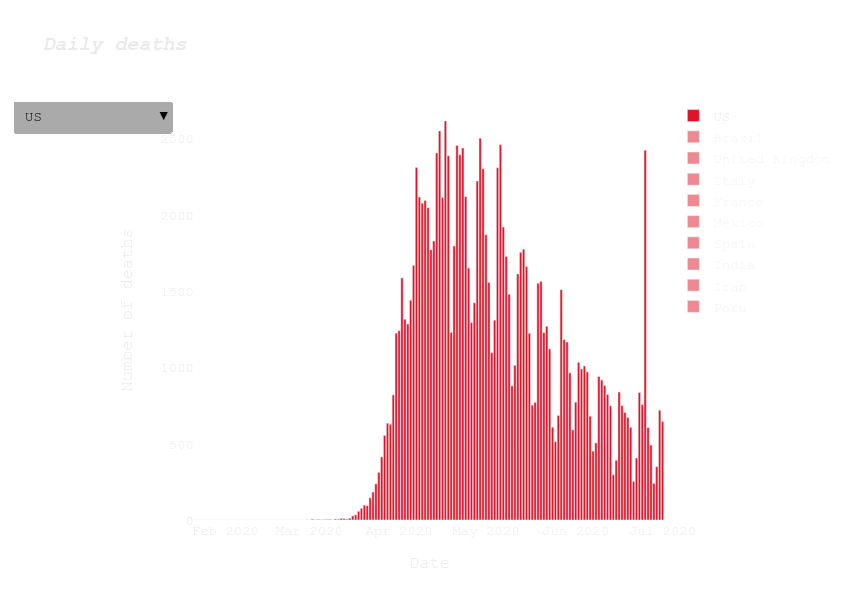

In [103]:
# create figure object
fig = go.Figure()

# list of drop-down menu buttons
buttons_list = []

# number of countries
number_of_countries = len(countries_daily_deaths.Country.unique())

# add bar chart for each country
for idx, country_name in enumerate(countries_daily_deaths.Country.unique()):
    
    # get country daily deaths
    country_daily_deaths_df = countries_daily_deaths[countries_daily_deaths.Country == country_name]
    
    bar_visibility = None if idx == 0 else "legendonly"
    
    # add bar chart for the figure
    fig.add_trace(
        go.Bar(x=country_daily_deaths_df.date,
               y=country_daily_deaths_df.daily_deaths,
               name=country_name,
               marker_color=red_color_hex,
               visible=bar_visibility
              )
    )
    
    button_visibility_settings = [False] * number_of_countries
    button_visibility_settings[idx] = True
    
    button = dict(label=country_name,
                  method='update',
                  args=[
                      {'visible': button_visibility_settings},
                      {'title': country_name, 'showlegend': True}
                  ]
                 )
    # add corresponding drop-down button for this chart
    buttons_list.append(button)

# update figure layout to set menu settings
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            bgcolor='#AAAAAA',
            bordercolor='#FFFFFF',
            font=dict(size=14,
                      color='#000000',
                      family="Courier New, monospace"),
            buttons=buttons_list,
            showactive=True
        )
    ],
    autosize=False,
    width=1000, height=600,
    title_text='<i><b>Daily deaths</b></i>',
    xaxis_title="Date", yaxis_title="Number of deaths",
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor= 'rgba(0, 0, 0, 0)',
    font={
        'family': "Courier New, monospace",
        'size': 14,
        'color': "#eaeaea"
    }
)

fig.show()

In [104]:
save_fig_as_div(fig_obj=fig, file_name="most_affected_countries_daily_deaths_bar_chart.html")